In [30]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
path = "../../feature1_clean.csv"
df = pd.read_csv(path)

In [32]:
df.columns

Index(['Dati', 'Time', 'DEPTH', 'ENGINE_1_FLOWRATE', 'ENGINE_1_FLOWRATEA',
       'ENGINE_1_FLOWRATEB', 'ENGINE_1_FLOWTEMPA', 'ENGINE_1_FLOWTEMPB',
       'ENGINE_1_FUEL_CONSUMPTION', 'ENGINE_2_FLOWRATE', 'ENGINE_2_FLOWRATEA',
       'ENGINE_2_FLOWRATEB', 'ENGINE_2_FLOWTEMPA', 'ENGINE_2_FLOWTEMPB',
       'ENGINE_2_FUEL_CONSUMPTION', 'HEADING', 'LATITUDE', 'LONGITUDE',
       'PITCH_1', 'PITCH_2', 'POWER_1', 'POWER_2', 'RATE_OF_TURN', 'SOG',
       'SOG_SPEEDLOG_LONG', 'SOG_SPEEDLOG_TRANS', 'SPEED_1', 'SPEED_2', 'STW',
       'THRUST_1', 'THRUST_2', 'TORQUE_1', 'TORQUE_2', 'TRACK_MADE_GOOD',
       'WIND_ANGLE', 'WIND_SPEED', 'WIND_ANGLE_TRUE', 'WIND_SPEED_TRUE',
       'MODE', 'datetime', 'season', 'weekday', 'current', 'direction',
       'temperature', 'humidity', 'pressure', 'precipitation', 'rain',
       'snowfall', 'weathercode', 'wind_force', 'wind_direc', 'date',
       'holiday', 'is_weekday', 'resist_ratio1', 'resist_ratio2'],
      dtype='object')

In [33]:
df = df[['DEPTH', 'ENGINE_1_FLOWRATE', 'ENGINE_1_FLOWTEMPA', 'ENGINE_1_FLOWTEMPB',
       'ENGINE_2_FLOWTEMPA', 'ENGINE_2_FLOWTEMPB', 'HEADING', 'LATITUDE', 'LONGITUDE',
       'PITCH_1', 'PITCH_2', 'POWER_1', 'POWER_2', 'RATE_OF_TURN', 'SOG',
       'SOG_SPEEDLOG_LONG', 'SOG_SPEEDLOG_TRANS', 'SPEED_1', 'SPEED_2', 'STW',
       'THRUST_1', 'THRUST_2', 'TORQUE_1', 'TORQUE_2', 'TRACK_MADE_GOOD',
       'WIND_ANGLE_TRUE', 'WIND_SPEED_TRUE',
       'MODE', 'current', 'direction','resist_ratio1', 'resist_ratio2']]

In [34]:
# get one_hot for column
def one_hot(df, cols, drop_original=False):
    for col in cols:
        dummy = pd.get_dummies(df[col],prefix=col, drop_first=drop_original)
        df = pd.concat([df, dummy], axis=1)
    return df

df = one_hot(df, ["direction"], drop_original=True)
to_predict = StandardScaler().fit_transform(df)

In [35]:
model = KMeans(5)
res = model.fit_predict(to_predict)

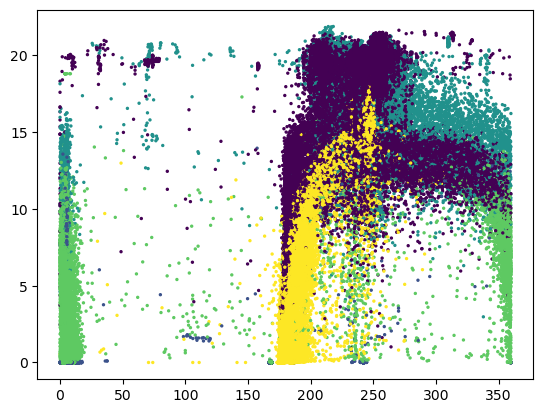

In [36]:
plt.scatter(df.HEADING, df.SOG, c = res, s=2)

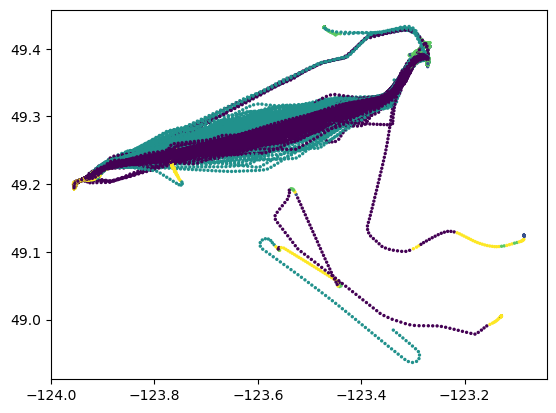

In [37]:
plt.scatter(df.LONGITUDE, df.LATITUDE, c = res, s=2)

In [38]:
dbscan = DBSCAN(eps=0.1, n_jobs=-1)
extreme_case = dbscan.fit_predict(to_predict)

KeyboardInterrupt: 

In [ ]:
plt.scatter(df.LONGITUDE, df.LATITUDE, c = extreme_case, s=2)